# 1. 간단한 예제로 케라스 맛보기

In [1]:
# 1. 케라스 사용의 간단한 예제

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [3]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (100,1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [4]:
# 훈련 데이터 셋

import numpy as np
X_train = np.random.randn(1000, 100, 1)
y_train = np.random.randint(2, size = (1000,1))

In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.4910
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5530
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5950
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6050
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6140
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6390
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6580
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.6500
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.6570
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6530


## 1. Sequential

* Sequential() 클래스를 사용하면 간단한 순차적인 구조를 가진 모델을 쉽게 구성할 수 있습니다. 즉, 입력층부터 출력층 까지 차례대로 쌓아가는 것으로 모델을 구성할 수 있습니다.
* 이후 add() 메서드를 사용하여 입력층과 은닉층, 출력층을 추가할 수 있다
* 최종적으로 compile()메서드를 사용하여 모델을 완성시킬 수 있음

In [7]:
from keras.models import Sequential
from keras.layers import Dense

#1. Sequential 모델 생성
model = Sequential()

#2. 입력층과 은닉층 추가
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=32, activation='relu'))

#3. 출력층 추가
model.add(Dense(units=10, activation='softmax'))

#4. 결과 확인

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 8874 (34.66 KB)
Trainable params: 8874 (34.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Sequential의 다른 사용방법
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(units=64, activation='relu', input_dim=100),
    Dense(units=32, activation='relu'),
    Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                6464      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 10)                330       
                                                                 
Total params: 8874 (34.66 KB)
Trainable params: 8874 (34.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Functional API 사용법

from keras.models import Model
from keras.layers import Input, Dense

#1. 입력층 정의
inp = Input(shape=(100,))

#2. 은닉층 정의
x = Dense(units=64, activation='relu')(inp)
x = Dense(units=32, activation='relu')(x)

#3. 출력층 정의
out = Dense(units=10, activation='softmax')(x)

#4. 모델 구성
model = Model(inputs=inp, outputs=out)

#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_31 (Dense)            (None, 64)                6464      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 10)                330       
                                                                 
Total params: 8874 (34.66 KB)
Trainable params: 8874 (34.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Input_shape

* input_shape은 모델의 첫번째 레이어에만 지정해주며, 이의 레이어에서는 자동으로 입력 데이터의 형태를 추정
* 2차원 데이터
    * (num_samples, num_features) 형태의 2차원 배열로 표현됩니다.
    * ```input_shape = (num_features, )```
    * 2차원 데이터의 경우에는 input_shape 대신에 input_dim을 사용할 수도 있습니다. input_dim = num_features,

In [1]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(units=256, activation='relu', input_shape=(28*28, )), # mnist데이터셋 가정, 이경우 28*28픽셀의 256개 사진을 의미한다
    Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 입력은 최소 2차원(행렬) 이상의 넘파이 배열이나 텐서로 만들어야 한다.  

import tensorflow as tf
import numpy as np

inp = np.array([[1.0], [2.0], [3.0]]) #사용 가능
inp_tensor = tf.convert_to_tensor(inp) #사용 가능
inp_list = [[1.0], [2.0], [3.0]] #사용 불가, error

out1 = Dense(10, activation='relu', input_dim=1)(inp)
out2 = Dense(10, activation='relu', input_shape=(1,))(inp)

print(inp.shape, inp_tensor.shape, out1.shape)
print(inp.shape, inp_tensor.shape, out2.shape)

(3, 1) (3, 1) (3, 10)
(3, 1) (3, 1) (3, 10)


### 3차원 데이터

* 입력 데이터가 3차원 배열(num_samples, num_time_steps, num_features)의 경우 input_shape = (num_time_steps, num_features)와 같이 지정
* 입력 데이터의 형태에 따라 num_time_steps이 다른 feature로 변경될 수 있다  
* 밑의 예제의 경우 시간 단계가 390개 feqture가 (주식가격, 거래량, 지수)를 의미 한다고 생각하면 됨

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential([
    LSTM(256, input_shape=(390,3)),
    Dense(1)
]) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               266240    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 266497 (1.02 MB)
Trainable params: 266497 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4차원 데이터

* 일반적으로 이미지 데이터의 경우 4차원 배열 형태를 가짐
* 32*32 이미지의 경우 => (num_samples, feature_1(32), feature_2(32), RGB(3))

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)), # 앞의 32: filter 갯수, 뒤에 (3,3): filter size
    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                288010    
                                                                 
Total params: 288906 (1.10 MB)
Trainable params: 288906 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## tf.keras.backend.clear_session()

* kears는 Tensorflow, Theano, CNTK와 같은 백엔드 엔진과 함께 사용될 수 있습니다.
* keras에서 backedn.clear_session() 함수는 현재 세션에 존재하는 모든 텐서 객체들을 삭제함
* 모델을 여러 번 훈련할 때 이전에 사용되었던 가중치(weight)등을 초기화하는데 사용된다.

In [8]:
import keras.backend as K

K.clear_session()

## utils.to_categorical

* 케라스의 to_categofical() 함수는 정수형 클래스 레이블을 원-핫 인코딩 벡터로 변환하는 함수(음수 값이 있으면 안됨)

In [9]:
from keras.utils import to_categorical

labels = [0,1,2,1,0]
one_hot_labels = to_categorical(labels)

print(one_hot_labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Conv1D

```
tf.keras.layers.Conv1D(
    filters, kernel_size, strides=1, padding='valid', activation = None,
    use_bias = True, kernel_initialize = 'glorot_uniform',
    bias_initalize = 'zeros', kernel_regulaizer = None,
    bias_regulaizer = None, activity_regulaizer = None,
    kernel_constraint = None, bias_constraint = None, **kwargs
)
```

```tf.keras.layers.Conv1D```는 1차원 입력 데이터에 대해 합성곱(convolution) 연산을 수행하는 케라스(Keras) 레이어입니다.   
이 레이어는 주로 시계열 데이터나 자연어 처리(NLP) 분야에서 사용됩니다.

Conv1D 레이어는 입력으로 3D 텐서를 받습니다. 이 텐서는 (batch_size, sequence_length, input_dim)의 형태를 가지며, 각각의 차원은 다음과 같습니다:

> batch_size: 한 번에 처리할 데이터 샘플의 개수  
> sequence_length(time_steps): 입력 시퀀스(time)의 길이  
> input_dim(feature): 입력 시퀀스의 특성수 (예: 단어 임베딩 벡터의 차원)  

Conv1D 레이어는 다음과 같은 매개변수를 가집니다:

>filters: 필터의 수 (즉, 출력 채널의 수)  
>kernel_size: 필터의 크기  
>strides: 필터를 이동시키는 간격 (기본값은 1)  
>padding: 경계 처리 방법 (기본값은 'valid')  
>activation: 활성화 함수 (기본값은 None)  

>use_bias: 바이어스 벡터를 사용할지 여부를 결정합니다.  
>kernel_initializer: kernel 가중치 행렬을 초기화하는 데 사용되는 방법입니다.  
>bias_initializer: 바이어스 벡터를 초기화하는 데 사용되는 방법입니다.  
>kernel_regularizer: 커널 가중치 행렬에 적용되는 규제 함수입니다.  
>bias_regularizer: 바이어스 벡터에 적용되는 규제 함수입니다.  
>activity_regularizer: 레이어 출력에 적용되는 규제 함수입니다.  
>kernel_constraint: 커널 가중치에 적용되는 제약 함수입니다.  
>bias_constraint: 바이어스 벡터에 적용되는 제약 함수입니다.`  

In [11]:
# 사용 예

import tensorflow as tf

x = np.random.randn(1000, 100, 1)
y = tf.keras.layers.Conv1D(32, 3, activation = 'relu', input_shape=(100, 1))(x)
print(y.shape)

(1000, 98, 32)


In [12]:
y2 = tf.keras.layers.Conv1D(32, 3, activation='relu')(y)
print(y2.shape)

(1000, 96, 32)


출력 차원 계산 방법  

>filters: 필터의 개수, 즉 출력 공간의 차원 수.  
>kernel_size: 필터의 크기. 예를 들어, 3의 경우, 3개의 연속된 입력 값에 대해 필터가 적용됩니다.  
>padding: 'same' 또는 'valid' 중 하나. 'same'의 경우, 출력 크기가 입력과 동일하도록 입력에 패딩이 추가됩니다.  
>strides: 필터의 이동 크기. 예를 들어, 1의 경우, 필터가 한 번에 한 칸씩 이동합니다.  

In [ ]:
# padding = 'valid' 의 경우 
# output = (time_steps - kernel_size + 1) / strides

# padding = 'same' 의 경우
# output = ceil(time_steps / strides)

# 출력의 크기는 (batch_size, output, filters)

In [94]:
np.random.randint(0,10, size = (3,3,2))

array([[[4, 3],
        [9, 3],
        [3, 2]],

       [[3, 9],
        [0, 1],
        [5, 6]],

       [[2, 8],
        [1, 8],
        [8, 8]]])

In [96]:
# input size, filter size, output size의 관계

# Conv1D 레이어 생성
conv1d_layer = tf.keras.layers.Conv1D(1, 2, input_shape=(3, 2))

# 더미 입력을 사용하여 레이어를 호출하여 모델을 빌드
dummy_input = tf.constant(np.random.randint(0,10, size=(100,32,3)), dtype=float)
print(dummy_input)
dummy_output = conv1d_layer(dummy_input)

# 레이어의 가중치를 가져오기
filters, biases = conv1d_layer.get_weights()

print("Filters:")
print(filters)
#print(biases)

dummy_output

tf.Tensor(
[[[6. 9. 4.]
  [0. 9. 9.]
  [0. 2. 3.]
  ...
  [6. 1. 3.]
  [3. 1. 9.]
  [7. 7. 9.]]

 [[8. 4. 7.]
  [2. 6. 5.]
  [3. 8. 5.]
  ...
  [4. 2. 2.]
  [1. 7. 3.]
  [0. 9. 3.]]

 [[5. 1. 1.]
  [2. 6. 2.]
  [2. 0. 5.]
  ...
  [8. 0. 9.]
  [0. 8. 9.]
  [1. 3. 6.]]

 ...

 [[2. 1. 5.]
  [5. 8. 5.]
  [5. 3. 6.]
  ...
  [6. 3. 0.]
  [1. 8. 8.]
  [9. 7. 3.]]

 [[4. 3. 7.]
  [7. 2. 3.]
  [0. 7. 4.]
  ...
  [5. 3. 2.]
  [6. 8. 3.]
  [8. 0. 4.]]

 [[4. 2. 1.]
  [6. 5. 0.]
  [3. 4. 7.]
  ...
  [8. 9. 4.]
  [1. 4. 2.]
  [3. 6. 4.]]], shape=(100, 32, 3), dtype=float32)
Filters:
[[[-0.39334732]
  [-0.8473252 ]
  [-0.52744555]]

 [[-0.3736507 ]
  [-0.54628056]
  [ 0.6362956 ]]]


<tf.Tensor: shape=(100, 31, 1), dtype=float32, numpy=
array([[[-11.285659 ],
        [-11.556611 ],
        [ -7.067718 ],
        ...,
        [ -7.02203  ],
        [ -0.7303178],
        [ -7.487236 ]],

       [[-11.071705 ],
        [-10.817591 ],
        [-17.491657 ],
        ...,
        [ -7.4184585],
        [ -6.611658 ],
        [-10.914598 ]],

       [[ -6.0939007],
        [ -4.49136  ],
        [-10.409721 ],
        ...,
        [-11.065825 ],
        [ -6.5373726],
        [ -9.72033  ]],

       ...,

       [[ -7.3282676],
        [-11.071888 ],
        [-11.89939  ],
        ...,
        [-14.559032 ],
        [ -4.555589 ],
        [-16.669447 ]],

       [[ -9.606712 ],
        [ -7.3092003],
        [-14.591584 ],
        ...,
        [-10.487018 ],
        [-10.266865 ],
        [-11.165046 ]],

       [[ -8.768792 ],
        [ -5.448715 ],
        [-11.491111 ],
        ...,
        [-14.210086 ],
        [-14.168669 ],
        [ -6.6909924]]], dtype=float32)>

## MaxPooling1D

* 이 레이어는 1D 데이터 (시계열 데이터 또는 한 줄의 문자열과 같은 데이터)에서 최대 풀링(Max Pooling) 연산을 수행합니다.
* ```tf.keras.layers.polling.Maxpolling1D=(tf.keras.layer.MaxPool1D)``` 레이어는 입력 데이터에서 일정한 간격으로 구역을 나누고 각 구역에서 가장 큰 값을 선택하여 출력 데이터를 생성
* 입력 데이터의 크기를 줄이고, 필터링 된 데이터의 중요한 특징을 추출

```
tf.keras.layers.MaxPool1D(
    pool_size = 2,
    strides = None,
    padding = 'valid',
    data_format = 'channels_last'
    **kwargs
)
```

In [1]:
import tensorflow as tf
import numpy as np

x = np.random.randn(100, 32, 3) #(batch_size, D_in, filter_s)
y = tf.keras.layers.MaxPooling1D(pool_size=2, padding='valid')(x)
y.shape

TensorShape([100, 16, 3])

In [27]:
import tensorflow as tf
import numpy as np

x = np.random.randn(100, 32, 3)
y1 = tf.keras.layers.Conv1D(10, 16, activation='relu', input_shape=(32, 3))(x)
print(y1.shape)
y2 = tf.keras.layers.MaxPooling1D(3)(y1)
print(y2.shape)

y3 = tf.keras.layers.MaxPool1D(4)(y1)
print(y3.shape)
# output filter_size 가 0이 되면 오류 발생
# 여기서는 오류가 발생하지 않지만 암튼 안됨

(100, 17, 10)
(100, 5, 10)
(100, 4, 10)


## Flatten

* ```tf.keras.Flatten```은 입력 데이터를 1차원으로 평탄화 함
* 입력 데이터의 형태를 변경하지 않고 1D 벡터로 변환, Flatten()레이어는 학습 가능한 가중치를 갖지 않는다

In [107]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(32, 3, input_shape = (100, 1)))
print(model.output_shape)
model.add(tf.keras.layers.MaxPooling1D(2))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 98, 32)
(None, 49, 32)
(None, 1568)


## Dense

* Affine 계층이라고도 부름  
  
* Dense는 딥러닝에서 가장 기본적인 구성 요소 중 하나인 fully connected layer를 구현한 클래스
* Dense 레이어는 입력 뉴련과 출력 뉴런이 모두 연결되어 있는 구조
  
* 입력 벡터와 가중치 행렬의 곱셈에 편향을 더하여 활성화 함수를 거친 출력 값을 계산
* 일반적으로 ReLU, sigmoid, tanh등이 사용됩니다
  
* 이미지 분류 문제에서는 Flatten 레이어로 이미지를 일차원 벡터로 변환한 후에 Dense 레이어를 추가하여 출력 클래스에 대한 확률값을 계산

In [111]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(100,)),
    Dense(units=10, activation='softmax')
])
model.output_shape

(None, 10)

activation 함수의 종류

>linear : 입력과 동일한 값을 출력합니다.  
>sigmoid : 시그모이드 함수를 사용하여 출력값을 0과 1 사이의 값으로 변환합니다. 이진 분류 모델에서 출력층에 많이 사용됩니다.  
>tanh : 하이퍼볼릭 탄젠트 함수를 사용하여 출력값을 -1과 1 사이의 값으로 변환합니다. 은닉층에 많이 사용됩니다.  
>relu : ReLU(Rectified Linear Unit) 함수를 사용하여 출력값을 0 이상의 값으로 변환합니다. 은닉층에 많이 사용됩니다.  
>softmax : softmax 함수를 사용하여 출력값을 다중 클래스 분류에 적합한 확률 값으로 변환합니다. 다중 클래스 분류 모델에서 출력층에 많이 사용됩니다.  
>selu : SELU(Scaled Exponential Linear Unit) 함수를 사용하여 출력값을 0과 1 사이로 스케일링합니다. 자기 정규화(Self-Normalizing) 효과로 인해 딥러닝 모델의 성능을 향상시킬 수 있습니다.  
>이 외에도 다양한 activation 함수가 존재합니다. 필요에 따라서 다른 activation 함수를 사용할 수도 있습니다.

## .compile()

* 케라스의 compile() 함수는 모델을 컴파일하는 함수입니다
* compile() 함수의 주요 인자
>optimizer: 최적화 방법을 설정합니다. 경사 하강법 등 다양한 최적화 알고리즘이 존재합니다.  
>loss: 손실 함수를 설정합니다. 모델이 예측한 값과 실제 값 사이의 차이를 계산하는 함수입니다.  
>metrics: 평가 지표를 설정합니다. 학습 중 모델의 성능을 평가할 때 사용됩니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 점수 등이 있습니다.  

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(100,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


keras compile 옵션
  
* optimizer: 최적화 알고리즘을 설정합니다. SGD, RMSprop, Adagrad, Adadelta, Adam 등 다양한 최적화 알고리즘이 제공됩니다.
>>SGD : 확률적 경사 하강법(Stochastic Gradient Descent)으로, 가장 기본적인 최적화 알고리즘입니다.  
>>RMSprop : RMS(Root Mean Square) 값을 이용하여 최적화하는 알고리즘입니다.  
>>Adagrad : 학습률을 개별 매개변수에 적응적으로 조정하는 방식의 최적화 알고리즘입니다.  
>>Adadelta : Adagrad의 학습률 감소 버전으로, 학습률이 지속적으로 감소하며 학습률 조정에 대한 hyperparameter를 더욱 간단하게 설정할 수 있습니다.  
>>Adam : 학습률을 자동으로 조정하는 알고리즘으로, 현재 가장 많이 사용되는 최적화 알고리즘 중 하나입니다.  

* loss: 손실 함수를 설정합니다. 손실 함수는 모델의 예측값과 실제값의 차이를 계산합니다. 이 차이가 작을수록 모델이 좋은 성능을 보이게 됩니다. 회귀 문제에서는 mean_squared_error, 분류 문제에서는 categorical_crossentropy 또는 binary_crossentropy 등이 주로 사용됩니다.

* metrics: 평가 지표를 설정합니다. 모델의 성능을 평가할 때 사용됩니다. 회귀 문제에서는 mse, 분류 문제에서는 accuracy, precision, recall, f1-score 등이 사용됩니다.

* loss_weights: 손실 함수에 대한 가중치를 설정합니다. 일반적으로 다중 손실 함수 모델에서 사용됩니다.

* weighted_metrics: 샘플 가중치를 고려한 평가 지표를 설정합니다.

* sample_weight_mode: 샘플 가중치를 적용하는 방법을 설정합니다.

* target_tensors: 모델의 출력 대상을 설정합니다.

## losses

* 케라스에서 losses는 모델을 학습할때 사용되는 손실 함수를 의미
* 학습은 손실 함수를 최소화하는 방향으로 진행됨

loss의 종류
>mean_squared_error: 회귀 문제에서 가장 일반적으로 사용되는 손실 함수입니다. 예측 값과 실제 값 사이의 평균 제곱 오차를 계산합니다.  
>mean_absolute_error: 회귀 문제에서 사용되는 손실 함수로, 예측 값과 실제 값 사이의 평균 절대 오차를 계산합니다.  
>binary_crossentropy: 이진 분류 문제에서 사용되는 손실 함수입니다. 정답이 0 또는 1인 이진 분류 문제에서 사용됩니다.  
>categorical_crossentropy: 다중 클래스 분류 문제에서 사용되는 손실 함수입니다. 각 클래스의 확률 분포와 실제 값 간의 크로스 엔트로피를 계산하여 손실 값을 구합니다.  
>sparse_categorical_crossentropy: 다중 클래스 분류 문제에서 사용되는 손실 함수입니다. 정답 레이블을 one-hot encoding으로 변환하지 않고, 정수 값으로 사용하는 경우에 적합합니다.  
>binary_hinge: 이진 분류 문제에서 사용되는 손실 함수입니다. margin-based loss function으로, SVM에서 사용되는 hinge loss와 유사합니다.  
>categorical_hinge: 다중 클래스 분류 문제에서 사용되는 손실 함수입니다. margin-based loss function으로, SVM에서 사용되는 hinge loss와 유사합니다.  



## optimizers

* 케라스에서 제공하는 optimizer의 종류와 주요 인자에 대한 설명

SGD(Stochastic Gradient Descent)
* 가장 기본적인 최적화 알고리즘, 미분 가능한 함수에서 기울기를 계산하여 가중치를 업데이트

```keras.optimizers.SGD(learning_rate=0.01, momentum = 0.0)```

RMSprop(Root Mean Squared Propagation)
* SGD의 단점중 하나인 학습률을 설정하기 어려운 문제를 해결하기 위해 고안된 알고리즘, 기울기 제곱의 이동평균 값을 구하여 학습률을 조잘함  

```keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0)```

Adagrad(Adaptive Gradient Algorithm)
* 학습을 진행할수록 학습률을 낮추는 방식으로 가중치를 업데이트하는 알고리즘입니다. 자주 등장하는 피처들의 가중치는 작아지고, 드물게 등장하는 피처들은 크게 업데이트됩니다.

```keras.optimizers.Adagrad(learning_rate=0.001)```

Adam(Adaptive Moment Estimation)
* RMSprop과 모멘텀을 결합하여 만든 최적화 알고리즘입니다. 기울기 제곱과 모멘텀의 이동평균 값을 계산하여 학습률을 조절합니다.

```keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)```

## 평가 지표

accuracy: 분류 문제에서 많이 사용되는 평가 지표입니다. 모델의 예측값과 실제값이 일치하는 비율을 계산합니다.

binary_accuracy: 이진 분류 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값이 일치하는 비율을 계산합니다.

categorical_accuracy: 다중 클래스 분류 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값이 일치하는 비율을 계산합니다.

sparse_categorical_accuracy: 정수 형태의 레이블을 사용하는 다중 클래스 분류 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값이 일치하는 비율을 계산합니다.

top_k_categorical_accuracy: 다중 클래스 분류 문제에서 사용되는 평가 지표입니다. 상위 K개의 클래스 중에 실제 클래스가 포함되어 있는 경우를 계산합니다.

sparse_top_k_categorical_accuracy: 정수 형태의 레이블을 사용하는 다중 클래스 분류 문제에서 사용되는 평가 지표입니다. 상위 K개의 클래스 중에 실제 클래스가 포함되어 있는 경우를 계산합니다.

mean_squared_error: 회귀 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값의 제곱 오차를 계산합니다.

mean_absolute_error: 회귀 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값의 절대 오차를 계산합니다.

mean_absolute_percentage_error: 회귀 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값의 오차 비율을 계산합니다.

mean_squared_logarithmic_error: 회귀 문제에서 사용되는 평가 지표입니다. 모델의 예측값과 실제값의 로그값의 차이를 계산합니다.

cosine_similarity: 유사성 비교에서 사용되는 평가 지표입니다. 두 벡터 간의 코사인 유사도를 계산합니다.

평가 지표를 적절하게 선택하여 모델의 성능을 평가할 수 있습니다.

## .fit()

케라스에서 fit() 함수는 모델을 학습시키는 함수입니다. fit() 함수는 입력 데이터와 정답 데이터를 모델에 입력하여 모델의 가중치(weight)를 업데이트합니다.

fit() 함수는 다음과 같은 매개변수를 받습니다.

x: 모델의 입력 데이터를 나타내는 Numpy 배열 또는 Numpy 배열의 리스트

y: 모델의 정답 데이터를 나타내는 Numpy 배열 또는 Numpy 배열의 리스트

batch_size: 한 번에 처리되는 샘플의 수를 나타내는 정수 값. 기본값은 32입니다.

epochs: 모델이 학습할 총 횟수를 나타내는 정수 값. 기본값은 1입니다.

verbose: 학습 과정을 어떻게 출력할 것인지를 결정하는 값. 0, 1, 2 중 하나의 값을 가질 수 있으며, 0일 경우 출력이 없고, 1일 경우 진행 막대(progress bar)가 표시되고, 2일 경우 에포크마다 한 줄씩 출력됩니다. 기본값은 1입니다.

validation_data: 검증용 데이터를 나타내는 튜플. (x_val, y_val) 형태로 입력하며, 기본값은 None입니다.

callbacks : 훈련 중에 호출되는 콜백 함수의 리스트를 지정하는 인수입니다. 콜백(callback) 함수는 훈련 중간에 모델의 상태를 확인하거나, 모델의 가중치를 저장하는 등의 역할을 수행할 수 있습니다.

shuffle: 샘플을 학습할 때마다 데이터를 무작위로 섞을지 여부를 결정하는 값. 기본값은 True입니다.

위의 인자들이 기본적으로 많이 쓰이고 다음의 인자들도 유용하게 쓰입니다.

>---
sample_weight: 샘플 가중치입니다. 이 가중치는 각 샘플이 학습에서 차지하는 비중을 결정합니다. 예를 들어, 어떤 데이터셋에서 특정 클래스의 샘플을 더 중요하게 다루고 싶다면 해당 클래스의 샘플에 높은 가중치를 주어 학습에 더 큰 영향을 미치도록 할 수 있습니다.기본값: None
initial_epoch: 학습을 시작할 에포크 번호입니다. 이 인자를 사용하면 이전에 학습한 모델을 불러와서 이어서 학습을 수행할 수 있습니다. 기본값: 0
validation_split: 검증 데이터셋의 비율을 나타내는 실수값입니다. 예를 들어, 전체 데이터셋 중 20%를 검증 데이터셋으로 사용하려면 validation_split 값을 0.2로 설정합니다. 기본값: 0.0
validation_steps: 검증 데이터셋에서 몇 개의 배치를 사용할 것인지를 지정합니다.예를 들어, 검증 데이터셋을 전체적으로 사용하는 것보다 일부 배치만 사용하는 것이 더 효율적일 경우 validation_steps 값을 적절하게 설정합니다. 이 값이 지정되면 validation_data에 지정된 데이터셋의 일부만 사용합니다. 기본값: None
class_weight: 각 클래스에 대한 가중치를 지정합니다. 이 가중치는 클래스 불균형 문제를 해결하는 데 사용됩니다. 기본값: None
max_queue_size: 데이터를 전처리하거나 생성하는 데 사용되는 프로세스의 최대 큐 크기입니다. 기본값: 10
workers: 데이터를 전처리하거나 생성하는 데 사용되는 프로세스의 수입니다. 기본값: 1
use_multiprocessing: 멀티프로세싱을 사용하여 데이터를 전처리하거나 생성하는지 여부를 결정합니다. 기본값: False
steps_per_execution: GPU나 TPU를 사용하는 경우, 한 번 실행에 처리할 배치 수를 지정합니다. 기본값: 1
fit() 함수는 모델 학습을 시작하고, 각 에포크(epoch)마다 손실(loss)과 평가지표(metric)를 계산합니다. 이후에는 검증용 데이터에 대한 손실과 평가지표도 계산합니다. fit() 함수가 반환하는 객체는 학습 과정에서 발생한 정보들을 담은 History 객체입니다. 이 객체를 사용하여 학습 과정에서 발생한 손실 값과 평가지표 값의 변화를 그래프로 나타내거나, 학습 과정에서 최적의 모델을 저장할 수 있습니다.

## 반환하는 객체 history

model.fit() 메서드는 모델을 훈련시키는 동안 발생한 모든 정보를 담은 History 객체를 반환

> ```history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))```

> history.history는 딕셔너리 형태로 구성됨

history 객체를 이용해서 loss를 시각화하는 방법 예시
```python
import matplotlib.pyplot as plt

# 모델 훈련
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# 훈련 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 훈련 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
```            

## MNIST 연습

In [115]:
import tensorflow as tf
from tensorflow import keras

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 입력 데이터 전처리
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

# 모델 구성
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation = 'softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy', test_acc)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.2990 - accuracy: 0.9179 - val_loss: 0.1187 - val_accuracy: 0.9694
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0982 - accuracy: 0.9712 - val_loss: 0.0889 - val_accuracy: 0.9753
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0701 - accuracy: 0.9797 - val_loss: 0.0700 - val_accuracy: 0.9812
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0574 - accuracy: 0.9835 - val_loss: 0.0676 - val_accuracy: 0.9799
Epoch 5/5
313/313 [==============================] - 0s 899us/step - loss: 0.0557 - accuracy: 0.9822
Test accuracy 0.982200026512146


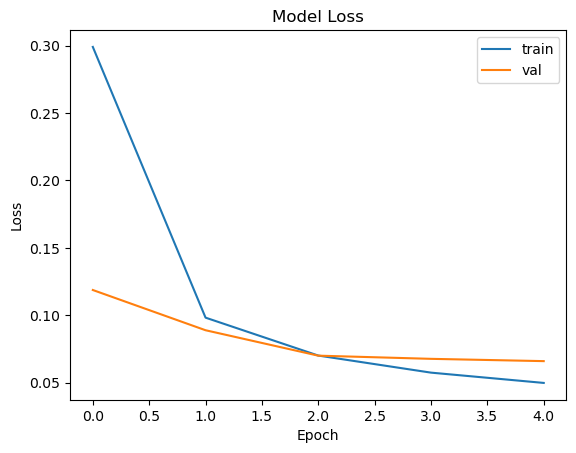

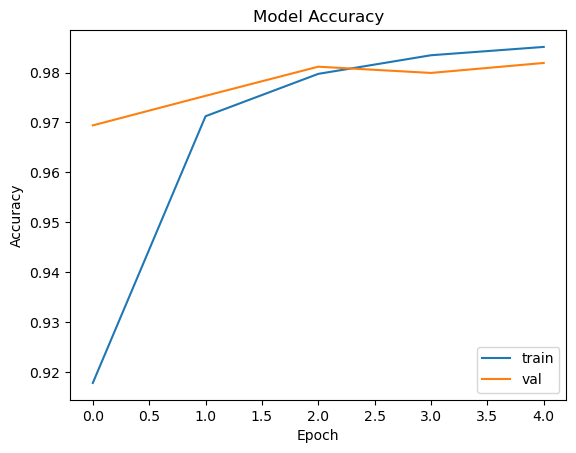

In [116]:
import matplotlib.pyplot as plt

# 훈련 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 훈련 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

## evaluation()

evaluate() 메서드는 학습된 모델을 사용하여 주어진 데이터셋에 대한 손실값과 지정된 평가 지표를 계산
* x: 모델에 입력될 데이터를 나타내는 Numpy 배열 또는 배열의 리스트
* y: 모델의 출력과 비교할 데이터를 나타내는 Numpy 배열 또는 배열의 리스트
* batch_size: 한 번에 처리할 샘플의 개수
* verbose: 진행 상황을 출력할지 여부. 0일 경우 출력하지 않고, 1일 경우 진행 상황 바와 함께 출력하며, 2일 경우 진행 상황 바 없이 출력합니다.
* sample_weight: 샘플별 가중치를 나타내는 Numpy 배열 또는 배열의 리스트
* steps: 평가할 총 샘플 수. None일 경우 x의 길이를 사용합니다.

결과값으로 손실값과 평가 지표를 튜플 형태로 반환, 첫번째 지표는 손실값, 두번째 지표는 모델에 지정된 평가 지표에 대한 값
* 모델에 지정된 평가 지표에 대한 값은 model.compile() 메서드에서 지정한 metric의 값

In [144]:
# 단순 결과값 확인
model.evaluate(X_test, y_test)

  1/313 [..............................] - ETA: 3s - loss: 0.0419 - accuracy: 0.9688

313/313 [==============================] - 0s 929us/step - loss: 0.0557 - accuracy: 0.9822


[0.05570954084396362, 0.982200026512146]

## .prediction()

Keras의 predict() 메소드는 모델의 예측 결과를 반환합니다.
* x: 모델의 입력 데이터. Numpy 배열 또는 배열의 리스트입니다.
* batch_size: 각 예측 단계에서 사용할 배치 크기입니다. 기본값은 32입니다.
* verbose: 예측 과정을 출력할지 여부를 결정합니다. 0, 1 또는 2의 값 중 하나입니다. 기본값은 1('auto')입니다.
* steps: 예측 단계 수입니다. x가 제공된 경우, steps는 x의 샘플 수를 batch_size로 나눈 값이 됩니다. 기본값은 None입니다.
* callbacks: 예측 중에 호출될 콜백 함수의 리스트입니다. 기본값을 사용하여 predict() 메소드를 호출하는 코드는 다음과 같습니다.


In [146]:
predictions = model.predict(X_test, batch_size=32, verbose=1, steps=None, callbacks=None)

  1/313 [..............................] - ETA: 2s

313/313 [==============================] - 0s 876us/step


array([[1.2499422e-08, 1.8726814e-08, 1.9481240e-06, ..., 9.9992633e-01,
        8.6765874e-07, 8.8220331e-06],
       [5.3126733e-08, 4.9194051e-07, 9.9998665e-01, ..., 1.3202078e-13,
        1.1850505e-06, 1.4862840e-10],
       [3.9128252e-05, 9.9682802e-01, 3.9581390e-04, ..., 5.0909910e-04,
        9.3008293e-04, 1.0203127e-05],
       ...,
       [7.7680848e-11, 7.6603017e-09, 4.0118264e-09, ..., 5.8369478e-06,
        1.7697592e-05, 4.9289825e-05],
       [7.4716041e-08, 4.4996540e-09, 6.6009496e-09, ..., 5.7227001e-09,
        4.2504738e-03, 2.3843165e-07],
       [2.9393052e-08, 1.5593629e-12, 1.3081464e-05, ..., 9.9997857e-11,
        8.0153626e-07, 2.4026919e-11]], dtype=float32)

In [154]:
np.argmax(predictions, axis=1) #최댓값의 위치를 반환, 이경우에는 정답 라벨이 됨

array([7, 2, 1, ..., 4, 5, 6])

## loss, accuracy 그래프

<Figure size 640x480 with 0 Axes>

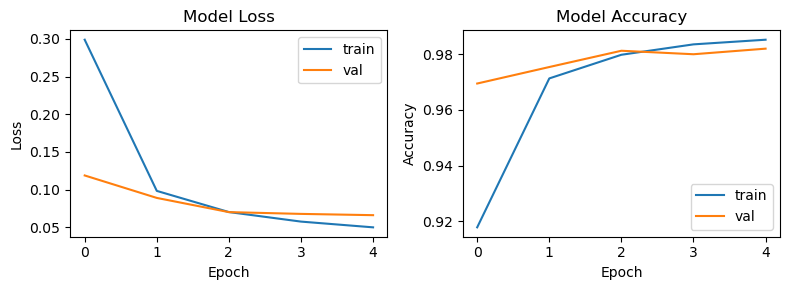

In [155]:
plt.clf()
plt.figure(figsize=(8,3))

# 훈련 손실 그래프
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.tight_layout()
plt.show()


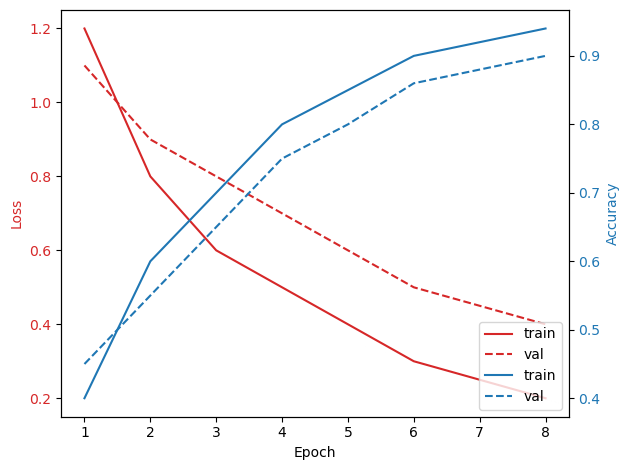

In [159]:
import matplotlib.pyplot as plt

# 간단한 예시용 loss, accuracy, val_loss, val_accuracy 리스트 생성
loss = [1.2, 0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2]
accuracy = [0.4, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94]
val_loss = [1.1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4]
val_accuracy = [0.45, 0.55, 0.65, 0.75, 0.8, 0.86, 0.88, 0.9]

# epoch 리스트 생성
epoch_list = list(range(1, len(loss)+1))

# plot 그리기
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epoch_list, loss, color=color, label='train')
ax1.plot(epoch_list, val_loss, linestyle='--', color=color, label='val')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(epoch_list, accuracy, color=color, label='train')
ax2.plot(epoch_list, val_accuracy, linestyle='--', color=color, label='val')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프에 legend 추가
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='lower right')
# ax1, ax2 두가지 범례를 모두 표기위한 방법

fig.tight_layout()
plt.show()


## MNIST 심화

```ModelCheckpoint```

* keras에서 제공하는 콜백중 하나로, 훈련 중에 모델의 가중치를 저장하는 기능을 수행

In [166]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import keras.backend as K
K.clear_session()

# 데이터 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 입력 데이터 전처리
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

# 모델 구성
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation = 'relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation = 'softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 5-fold cross-validation 적용
pred_list = []
kfold = KFold(n_splits=5, shuffle=True, random_state=2023)
for i, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    print(f'Fold : {i+1}')
    
    # train set 과 valid set 분리
    X_trn, y_trn = X_train[train_idx], y_train[train_idx]
    X_val, y_val = X_train[val_idx], y_train[val_idx]
    
    # 모델 학습
    cp = ModelCheckpoint(filepath = f'w_{i+1}.h5', save_best_only=True, save_weights_only = True, verbose=0)
    es = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = False, verbose = 1)
    cl = CSVLogger(f'fold_{i+1}.log')
    history = model.fit(X_trn, y_trn, epochs=20, batch_size=64,
                        validation_data = (X_val, y_val), callbacks=[cp,es,cl],
                        workers=-1, verbose=0)
    
    # 모델 평가
    model.load_weights(f'w_{i+1}.h5')
    pred = model.predict(X_test)
    pred_list.append(pred)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'loss: {loss:.4f} accuracy: {acc:.4f}')
    
    

Fold : 1
Epoch 11: early stopping
313/313 [==============================] - 0s 1ms/step
loss: 0.0611 accuracy: 0.9801
Fold : 2
Epoch 6: early stopping
313/313 [==============================] - 0s 1ms/step
loss: 0.0556 accuracy: 0.9825
Fold : 3
Epoch 4: early stopping
313/313 [==============================] - 0s 1ms/step
loss: 0.0537 accuracy: 0.9825
Fold : 4
Epoch 4: early stopping
313/313 [==============================] - 0s 1ms/step
loss: 0.0632 accuracy: 0.9804
Fold : 5
Epoch 4: early stopping
313/313 [==============================] - 0s 1ms/step
loss: 0.0559 accuracy: 0.9824


## keras.callbacks 모듈

keras.callbacks는 keras모델의 학습 과정 중에 호출되는 콜백 함수들을 포함하는 모듈  
모델 학습 도중에 지정된 시점에서 호출되어 추가적인 작업을 수행하거나 모델을 조작할 수 있습니다.

* ModelCheckpoint : 지정된 간격으로 모델의 가중치를 저장, 저장된 가중치 중에서 최상의 결과를 보인 모델을 선택할 수 있습니다.
* EarlyStopping : 모델이 더 이상 개선되지 않을 때 학습을 자동으로 종료, 오버피팅 방지
* ReduceLROnPlateau : 검증 손실이 개선되지 않을 때 학습률을 감소시킴, 이를 통해 학습이 더욱 안정적으로 진행될 수 있다.
* TensorBoard : 모델의 학습 과정을 시각화하기 위한 TensorBoard 로그를 생성합니다.
* CSVLogger : 모델의 학습 과정을 CSV파일로 기록합니다
* LearningRateScheduler : 학습률을 동적으로 조정합니다

## CSVLogger

CSVLogger는 Keras의 콜백(callback) 중 하나로, 모델의 훈련을 할 때, 각 에포크(epoch)의 손실값(loss)과 측정값(metric)을 CSV(Comma-Separated Values) 파일로 로깅(logging)  

* filename: 로그를 기록할 파일 이름입니다. 문자열 형식으로 지정합니다. 기본값은 csv_logger.csv입니다.
* separator: CSV 파일의 필드 구분 기호입니다. 기본값은 쉼표(',')입니다.
* append: 로그 파일을 새로 작성하는 대신 기존 파일에 추가할지 여부를 결정합니다. 기본값은 False입니다.

```python
# 예시 코드
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('training.log') # 로그 파일명을 지정합니다.
model.fit(x_train, y_train, epochs=10, callbacks=[csv_logger])
```

## EarlyStopping

EarlyStopping은 Keras 콜백 함수 중 하나로, 검증 손실이 더 이상 개선되지 않을 때 학습을 중단시키는 역할을 합니다. 이를 통해 과적합을 방지하고 학습 시간을 단축할 수 있습니다.
* monitor: 모니터링할 지표를 선택합니다. 일반적으로 'val_loss'나 'val_acc'를 선택합니다.
* min_delta: 개선되었다고 판단할 최소한의 변화량입니다. 이 값보다 작으면 개선이 없는 것으로 간주합니다. 기본값은 0입니다.
* patience: 개선이 없다고 판단하기 전에 대기할 에폭 수입니다. 즉, 이 값만큼 검증 손실이 개선되지 않으면 학습을 중단합니다. 기본값은 0입니다.
* mode: 모니터링할 지표를 최소화할지 최대화할지 결정합니다. 'min'으로 설정하면 지표를 최소화하고, 'max'로 설정하면 지표를 최대화합니다. 기본값은 'auto'로 지표가 'acc', 'accuracy', 'fmeasure', 'precision', 'recall' 중 하나이면 'max'로 설정하고, 그렇지 않으면 'min'으로 설정합니다.
* baseline: 모니터링할 지표의 기준값을 설정합니다. 이 값보다 개선되지 않으면 학습을 중단합니다.
* restore_best_weights: 최상의 가중치를 복원할지 여부를 결정합니다. 이 값을 True로 설정하면 학습 중 최상의 검증 손실을 가진 가중치를 복원합니다. 기본값은 False입니다.

```python
# 예시 코드
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])
```


## ModelCheckpoint

ModelCheckpoint는 Keras 모델을 학습하는 동안 일정한 간격으로 모델의 가중치를 저장하고, 최상의 성능을 보인 모델을 선택하는 기능을 제공합니다. 이 기능은 딥러닝 모델 학습의 안정성과 성능 향상을 위해 매우 유용합니다.

* filepath : 문자열. 모델 가중치를 저장할 파일 경로입니다. 파일 이름에는 epoch와 val_loss (또는 다른 지표)와 같은 템플릿 인수를 사용할 수 있습니다.
    * 보통 .h5확장자로 사용한다 
* monitor : 모니터링할 지표를 지정합니다. 기본값은 val_loss입니다.
* verbose : 얼마나 자세하게 정보를 표시할지를 제어합니다. 0, 1 또는 2로 설정할 수 있으며, 기본값은 0입니다.
* save_best_only : 가장 좋은 성능을 보인 가중치만 저장하려면 True로 설정합니다. 기본값은 False입니다.
* save_weights_only : 가중치만 저장하려면 True로 설정합니다. 기본값은 False입니다. False로 설정하면 모델 구조와 가중치를 모두 저장합니다.
* mode : 모니터링할 지표의 최소화 또는 최대화를 제어합니다. 'auto', 'min' 또는 'max' 중 하나로 설정할 수 있으며, 기본값은 'auto'입니다.
* save_freq : 가중치를 저장할 빈도를 지정합니다. 'epoch' 또는 정수를 입력할 수 있습니다. 'epoch'로 설정하면 각 에포크가 끝날 때마다 가중치를 저장합니다. 정수로 설정하면 해당 빈도로 가중치를 저장합니다. 기본값은 'epoch'입니다.

```python
from keras.callbacks import ModelCheckpoint

# ModelCheckpoint 객체를 생성합니다.
checkpoint = ModelCheckpoint("weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

# 모델을 학습합니다. ModelCheckpoint 객체를 콜백으로 전달합니다.
model.fit(x_train, y_train, epochs=10, batch_size=128, callbacks=[checkpoint])

# 이전에 저장된 모델 가중치를 불러옵니다.
model.load_weights("weights.h5")

# 이어서 모델을 학습합니다.
model.fit(x_train, y_train, epochs=10, batch_size=128, callbacks=[checkpoint])

# 모델 학습후 저장
model.save('model.h5')

# 저장된 모델 로드하기
from tensorflow.keras.models import load_model

model = load_model('model.h5')
```

## 모델 저장 및 로드

* 모델이 매우 큰 경우 가중치와 모델 아키택쳐로르 별도로 저장하는게 디스크 관리 부분에서 더 좋을수 있다.

```python 
## 모델저장하기
# 모델 아키텍처를 JSON 파일로 저장
m_j = model.to_json()
with open("model.json", "w") as f:
    f.write(m_j)

# 모델 가중치를 HDF5 파일로 저장
model.save_weights("weights.h5")

## 모델 불러오기
from keras.models import model_from_json
# 모델 아키텍처 로드
with open("model.json", "r") as f:
    m_j = f.read()
loaded_model = model_from_json(m_j)

# 모델 가중치 로드
loaded_model.load_weights("weights.h5")
```

## 학습률 조정 함수

* LearningRateScheduler와 ReduceLROnPlateau 콜백 함수는 모두 학습률을 조정하는 콜백 함수입니다.

* LearningRateScheduler 콜백 함수는 사용자가 지정한 함수에 따라 epoch마다 학습률을 업데이트 합니다. 즉, 사용자가 직접 학습률 감소 전략을 지정해줘야 하며, 학습률 감소 기준도 직접 정해줘야 합니다.

* 반면, ReduceLROnPlateau 콜백 함수는 학습률을 자동으로 감소시킵니다. 이 콜백 함수는 모니터링 중인 지표(여기서는 validation loss)에 대한 지정된 조건에 따라 학습률을 동적으로 감소시킵니다. 예를 들어, validation loss가 5 epoch 동안 감소하지 않을 경우 학습률을 감소시키는 방식으로 학습률을 조정합니다.

* 즉, LearningRateScheduler 콜백 함수는 사용자가 직접 학습률 감소 전략을 지정해주는 반면, ReduceLROnPlateau 콜백 함수는 모니터링 중인 지표에 대한 조건에 따라 학습률을 동적으로 감소시킵니다.



### LearningRateScheduler

LearningRateScheduler 콜백 함수는 학습률을 동적으로 조정할 수 있도록 해줍니다. 사용자가 지정한 함수에 따라 학습률이 epoch 마다 업데이트 됩니다.

```python 
from tensorflow.keras.callbacks import LearningRateScheduler

# 사용자가 지정한 함수
def lr_scheduler(epoch):
    # 10 epoch 마다 학습률 감소
    if epoch % 10 == 0:
        return 0.1 * (0.5 ** (epoch//10))
    else:
        return learning_rate

lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler_callback])


```

### ReduceLROnPlateau

ReduceLROnPlateau는 검증 손실이 개선되지 않을 때 학습률을 동적으로 조정하여 학습을 최적화하는 콜백 함수입니다. 검증 손실이 개선되지 않으면, 학습률을 줄여 더 작은 학습률로 다시 학습을 시도합니다. 이를 통해 모델 학습이 더욱 안정적으로 이루어지고, 수렴에 도움을 줍니다.

* monitor: 모니터링할 지표. 기본값은 'val_loss'입니다.
* factor: 학습률을 얼마나 감소시킬 것인지를 결정하는 인수입니다. 기본값은 0.1입니다. 예를 들어, factor가 0.5이면, 검증 손실이 개선되지 않을 때 학습률이 절반으로 줄어듭니다.
* patience: 검증 손실이 개선되지 않았을 때, 얼마나 많은 epoch를 기다릴 것인지를 결정하는 인수입니다. 기본값은 10입니다. 예를 들어, patience가 5이면, 검증 손실이 5 epoch 동안 개선되지 않으면 학습률을 감소시킵니다.
* mode: 모니터링 지표의 개선 여부를 어떻게 판단할 것인지를 결정하는 인수입니다. 기본값은 'auto'입니다. 'min', 'max', 또는 'auto' 중 하나의 값을 사용할 수 있습니다. 'min'인 경우 모니터링 지표가 감소할 때 개선되었다고 판단합니다. 'max'인 경우 모니터링 지표가 증가할 때 개선되었다고 판단합니다. 'auto'인 경우 monitor 매개변수에 따라 적절한 모드가 자동으로 선택됩니다.
* min_delta: 개선된 것으로 판단되기 위한 최소한의 변화량을 결정하는 인수입니다. 기본값은 1e-4입니다. 예를 들어, min_delta가 0.5이면, 모니터링 지표가 0.5보다 적게 개선되면 개선된 것으로 판단하지 않습니다.
* cooldown: 학습률을 감소시킨 이후 다시 학습을 재개하기까지 기다리는 epoch 수입니다. 기본값은 0입니다.
* min_lr: 학습률의 하한을 결정하는 인수입니다. 기본값은 1e-7입니다. 학습률이 min_lr보다 작아지면 학습이 중단됩니다.

```python
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[reduce_lr])
```

## 모델 평가 분석

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



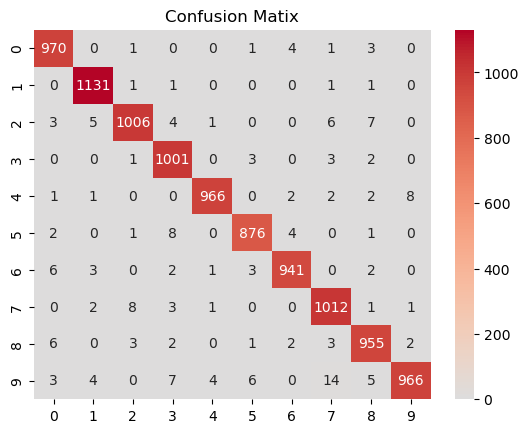

In [169]:
# 위에 MNIST 모델을 먼저 실행해야함

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(np.array(pred), axis=1)

print(classification_report(y_test,y_pred))

plt.title("Confusion Matix")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, center=0, cmap='coolwarm', fmt='g', cbar=True) #annot = True 는 그래프에서 숫자를 출력하게 하는 인자
plt.show()

# 유용한 케라스 Layers

## BatchNormalization

BatchNormalization은 딥러닝 모델에서 학습을 안정화하는 데 사용되는 Keras 레이어입니다. BatchNormalization은 일반적으로 합성곱 또는 fully connected layer(완전 연결 층: 케라스에서는 Dense)와 함께 사용되며, 입력 텐서의 각 배치에 대해 정규화를 수행합니다.  
  
BatchNormalization 레이어의 장점
* 그래디언트 소실 문제를 완화합니다.
* 모델의 가중치 초기화에 덜 민감합니다.
* 상대적으로 큰 학습률 사용으로 학습 속도가 빨라집니다.
* 미니 배치 단위로 학습이 수행되므로 미니 배치 단위로 데이터의 분포가 다를 경우 학습을 안정화할 수 있습니다.
* 정규화를 통해 과적합(overfitting) 문제를 방지합니다.
* BatchNormalization은 입력 데이터에 대해 각 채널마다 평균과 표준 편차를 계산합니다. 그런 다음, 이 평균과 표준 편차를 사용하여 정규화를 수행하고, 스케일링과 이동을 수행하여 결과를 출력합니다. 이러한 연산은 모든 배치에 대해 수행됩니다.
  
BatchNormalization 매개변수 
  
* axis: 정규화할 축을 선택합니다. 기본값은 -1입니다.
* momentum: 이동 평균의 가중치입니다. 기본값은 0.99입니다.
* epsilon: 분모에 추가되는 작은 상수입니다. 기본값은 0.001입니다.
* center: 평균을 조정할지 여부를 선택합니다. 기본값은 True입니다.
* scale: 분산을 조정할지 여부를 선택합니다. 기본값은 True입니다.
* beta_initializer: beta 가중치의 초기값을 설정합니다. 기본값은 'zeros'입니다.
* gamma_initializer: gamma 가중치의 초기값을 설정합니다. 기본값은 'ones'입니다.
* moving_mean_initializer: 이동 평균의 초기값을 설정합니다. 기본값은 'zeros'입니다.
* moving_variance_initializer: 이동 분산의 초기값을 설정합니다. 기본값은 'ones'입니다.
* beta_regularizer: beta 가중치에 대한 정규화 함수를 설정합니다. 기본값은 None입니다.
* gamma_regularizer: gamma 가중치에 대한 정규화 함수를 설정합니다. 기본값은 None입니다.
* beta_constraint: beta 가중치에 대한 제약 조건을 설정합니다. 기본값은 None입니다.
* gamma_constraint: gamma 가중치에 대한 제약 조건을 설정합니다. 기본값은 None입니다.
* BatchNormalization은 다음과 같은 단점이 있습니다.
  
BatchNormalization은 각 미니 배치에서 데이터의 평균과 분산을 계산합니다. 이는 모델이 더 일반적인 분포에서 작동하도록 합니다. ```그러나 미니 배치의 크기가 작을 경우 이러한 평균과 분산이 노이즈에 민감하게 반응할 수 있습니다.``` 이러한 경우 모델 성능이 감소할 수 있습니다. 일반적으로 큰 Batch size를 사용하는 것이 권장됩니다.  
따라서, BatchNormalization은 모델 성능을 향상시키는 데 유용하지만, 미니 배치의 크기와 모델의 다른 레이어와의 상호작용 등 몇 가지 제한 사항이 있습니다. 이러한 제한 사항을 고려하여 적절한 경우 BatchNormalization을 사용해야 합니다.

BatchNormalization은 입력 데이터를 정규화(normalize)하고, ```이에 대해 활성화 함수를 적용하기 전에 스케일링(scale) 및 이동(shift)을 수행합니다.``` 이렇게 스케일링 및 이동된 데이터는 활성화 함수의 입력으로 사용됩니다.  
  
따라서, BatchNormalization은 Activation 레이어 이전에 사용됩니다. 만약 BatchNormalization을 Activation 레이어 이후에 적용한다면, 정규화된 데이터가 활성화 함수에 대해 스케일링 및 이동되기 전에 활성화 함수의 입력으로 사용됩니다. 이는 BatchNormalization을 적용하는 의미가 퇴색되며, 오히려 모델 성능을 떨어뜨릴 수 있습니다.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense

model = Sequential()

# 첫 번째 합성곱 레이어
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 합성곱 레이어
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# 완전히 연결된 레이어
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


## Dropout

Dropout은 신경망의 일반화 성능을 개선하기 위해 고안된 regularization 기법 중 하나입니다. 신경망이 학습할 때, Dropout은 무작위로 일부 뉴런을 선택하여 그들의 출력을 0으로 만듭니다. 이는 신경망의 일부 파라미터를 무작위로 삭제하여 과적합을 방지하고, 모델의 일반화 능력을 향상시키는 데 도움이 됩니다.
  
복잡하고 깊은 신경망일때 사용하는게 좋다

```python 
import tensorflow as tf

# 입력 데이터
input_data = tf.keras.Input(shape=(100,))

# Dropout 레이어 정의
dropout = tf.keras.layers.Dropout(0.2) # 드랍아웃 비율은 0.2로 설정

# 레이어 적용
output_data = dropout(input_data)

print(output_data.shape) # 출력: (None, 100)

```

## GlobalAveragePooling2D

* 풀링 연산 레이어중 하나
* GlobalAveragePooling2D 레이어는 모델의 파라미터 수를 크게 줄일 수 있어서, 과적합을 방지하고 모델의 일반화 성능을 향상시키는 데 도움이 됩니다. 또한, 이 레이어는 입력의 공간 위치를 무시하고, 전체적인 패턴을 파악하는 데 유용합니다.
* 이 레이어는 주로 합성곱 신경망 (Convolutional Neural Networks, CNN)의 출력 또는 다른 2D 특성 맵을 다룰 때 사용됩니다. 일반적으로 CNN은 마지막에 GlobalAveragePooling2D 레이어를 추가하여 출력을 벡터로 변환하고, 이 벡터를 소프트맥스 레이어와 연결하여 클래스 분류를 수행합니다.

참고 : https://underflow101.tistory.com/41

In [170]:
import tensorflow as tf

x = tf.random.normal((32, 224, 224, 3))

y = tf.keras.layers.GlobalAveragePooling2D()(x)
print(y.shape)


# 224*224size, rgb 3 channel의 32장의 이미지 데이터 
# 각 1개의 이미지는 224*224, rgb 3채널의 이미지 => 224*224사이즈의 r 채널의 평균, 224*224사이즈의 g 채널의 평균, 224*224 사이즈의 b 채널의 평균 => 3개의 값이 있는 벡터
# => 이미지가 32개 이기때문에 32 * 3의 결과값이 나온다.

(32, 3)


## GlobalMaxPool1D

* GlobalMaxPool1D는 1차원의 입력 데이터에서 가장 큰 값을 선택하여 출력하는 레이어입니다.
* 입력데이터가 큰 경우에 유용함
* 입력 데이터의 크기가 (batch_size, timesteps, features)인 경우, GlobalMaxPool1D 레이어의 출력 차원은 (batch_size, features)가 됩니다.

In [171]:
import tensorflow as tf
import numpy as np

x = np.random.randn(1000,100,4)
max_pool_1d = tf.keras.layers.GlobalMaxPool1D()
max_pool_1d(x).shape

TensorShape([1000, 4])

## GlobalMaxPool2D

* Keras의 GlobalMaxPool2D 레이어는 2D 입력 텐서의 공간 차원을 풀링하여 하나의 벡터로 변환합니다. 이 레이어는 특성 맵의 공간 위치에 대한 정보를 유지하지 않고, 모든 공간 위치에서 가장 큰 값을 선택합니다.

In [208]:
from keras.layers import Input, Conv2D, GlobalMaxPool2D
from keras.models import Model

# 입력 데이터의 shape은 (batch_size, height, width, channels)
inputs = Input(shape=(28, 28, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = GlobalMaxPool2D()(x)  # GlobalMaxPool2D 적용
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 global_max_pooling2d_8 (Gl  (None, 32)                0         
 obalMaxPooling2D)                                               
                                                                 
 dense_9 (Dense)             (None, 10)                330       


                                                                 
Total params: 10474 (40.91 KB)
Trainable params: 10474 (40.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [214]:
import tensorflow as tf

# 입력 데이터의 차원: (batch_size, height, width, channels)
x = tf.random.normal((32, 224, 224, 3))

# GlobalAveragePooling2D 계층 생성
y = tf.keras.layers.GlobalMaxPool2D()(x)
print(y.shape) # 출력 데이터의 차원: (batch_size, channels)(32, 3)

(32, 3)


## 두 방법의 차이점 

* 방법 자체는 동일함, 평균으로 특징을 추출할지 최댓값을 특징을 추출할지의 차이가 있음

# 데이터 제너레이터 사용

## .fit_generator()

* Keras에서 모델 학습을 위해 fit_generator() 함수를 사용할 수 있습니다.
* 데이터가 매우 크거나 제한된 메모리를 사용하는 경우에 유용하게 사용 가능

>generator: 학습 데이터를 생성하는 제너레이터 객체  
>steps_per_epoch: 한 epoch에서 생성할 배치(batch) 개수입니다.  
>epochs: 전체 학습할 epoch 수입니다.  
>max_queue_size: 데이터 생성 시 큐(Queue)의 최대 크기를 지정합니다. shuffle: 각 에폭(epoch)마다 데이터를 임의로 섞을 것인지 여부를 지정합니다. verbose: 학습 중 출력을 제어합니다. 0은 출력하지 않음을 의미하고, 1은 진행바와 함께 출력하며, 2는 진행바 없이 출력합니다.  
>callbacks: 콜백 함수를 지정합니다. 콜백(callback)은 학습 과정 중에 특정 이벤트가 발생할 때 실행되는 함수입니다. 예를 들어, 모델 체크포인트를 저장하거나 학습률을 조정하는 등의 작업을 수행할 수 있습니다.  
>validation_data: 검증 데이터를 생성하는 제너레이터 객체 또는 넘파이 배열.  
>validation_steps: 검증 데이터에서 생성할 배치(batch) 개수입니다.  
>workers: 데이터 생성을 위해 사용할 프로세스 개수  
>use_multiprocessing: True로 설정하면, 생성기 함수를 병렬 처리하기 위해 멀티 프로세싱(multiprocessing)을 사용할 수 있습니다. 이 경우에는 workers 인자를 사용하여 몇 개의 프로세스를 사용할 것인지를 설정할 수 있습니다. 일부 경우에는 데이터를 복사해야 하기 때문에, 병렬 처리> 시간이 데이터 복사 시간에 의해 지연될 수 있습니다. 또한, 모든 경우에서 멀티 프로세싱을 사용하는 것이 빠른 것은 아니므로, 해당 컴퓨터에서의 효율적인 처리 방법을 찾아야 합니다.